In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

path = "/content/drive/My Drive/data/Wholesale customers data.csv"
df = pd.read_csv(path)
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
# Display the first 5 rows
df.head()


Mounted at /content/drive


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values if necessary
df.fillna(method='ffill', inplace=True)

# Display dataset info
df.info()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<ipython-input-7-2b77e5bfa661>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Spectral Clustering Silhouette Score: 0.77
DBSCAN Silhouette Score: 0.62
KMeans Silhouette Score: 0.57
Agglomerative Clustering Silhouette Score: 0.54
Gaussian Mixture Models Silhouette Score: 0.46
Best Algorithm: Spectral Clustering


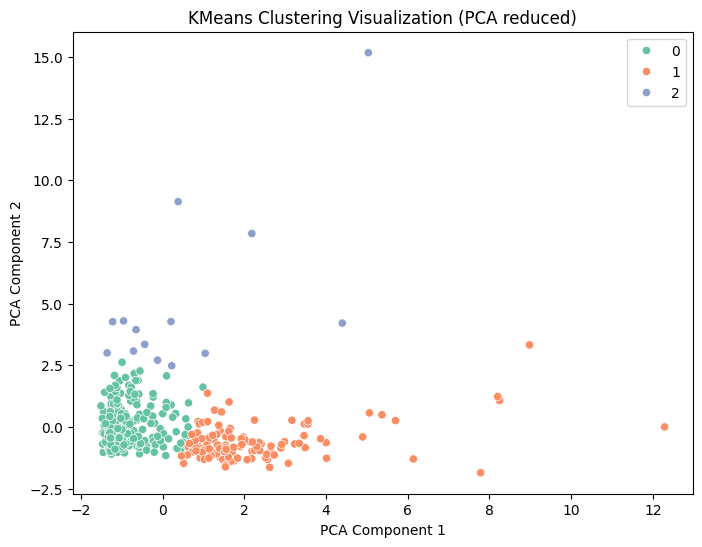

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preparation
# Load your dataset here, assuming `df` is your dataset.
# df = pd.read_csv('your_dataset.csv')

# Drop non-numeric columns if any
df = df.select_dtypes(include=[np.number])

# Step 2: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Dimensionality Reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_score = silhouette_score(X_pca, kmeans_labels)

# Step 5: Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=3, random_state=22)
spectral_labels = spectral.fit_predict(X_pca)
spectral_score = silhouette_score(X_pca, spectral_labels)
print(f"Spectral Clustering Silhouette Score: {spectral_score:.2f}")

# Step 6: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Handle case where DBSCAN may result in a single cluster
if len(set(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(X_pca, dbscan_labels)
else:
    dbscan_score = -1  # DBSCAN may return only one cluster

print(f"DBSCAN Silhouette Score: {dbscan_score:.2f}")

# Step 7: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_pca)
agglo_score = silhouette_score(X_pca, agglo_labels)

# Step 8: Print Silhouette Scores
print(f"KMeans Silhouette Score: {kmeans_score:.2f}")
print(f"Agglomerative Clustering Silhouette Score: {agglo_score:.2f}")

# Optional: Apply Gaussian Mixture Models (if required)
gmm = GaussianMixture(n_components=3, random_state=22)
gmm_labels = gmm.fit_predict(X_pca)
gmm_score = silhouette_score(X_pca, gmm_labels)
print(f"Gaussian Mixture Models Silhouette Score: {gmm_score:.2f}")

# Step 9: Determine the best algorithm
scores = {
    "KMeans": kmeans_score,
    "Agglomerative Clustering": agglo_score,
    "DBSCAN": dbscan_score,
    "Gaussian Mixture": gmm_score,
    "Spectral Clustering": spectral_score
}

best_algorithm = max(scores, key=scores.get)
print(f"Best Algorithm: {best_algorithm}")

# Step 10: Optional - Visualize the best clustering (using KMeans as example)
palette = sns.color_palette("Set2", len(set(kmeans_labels)))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette=palette)
plt.title("KMeans Clustering Visualization (PCA reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Dataset 2 For supervised learning datasets\





In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Load the dataset
df = pd.read_csv("/content/drive/My Drive/data/studentmat.csv",sep=';')

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


=== Linear Regression Evaluation ===
R²: 0.8486419330541051
MAE: 1.1262309559063282
Confusion Matrix:
 [[48  0]
 [ 5 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       1.00      0.84      0.91        31

    accuracy                           0.94        79
   macro avg       0.95      0.92      0.93        79
weighted avg       0.94      0.94      0.94        79



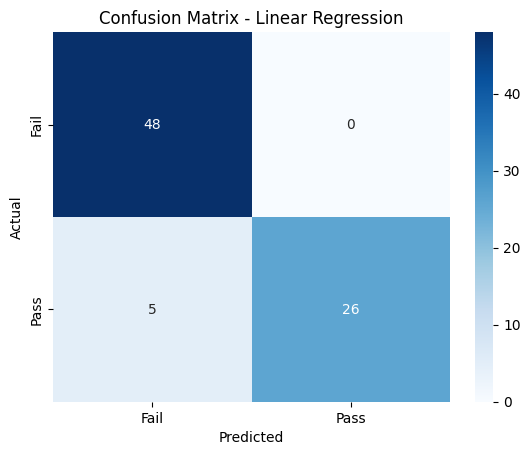

=== Random Forest Evaluation ===
R²: 0.8753253148281208
MAE: 0.9635443037974686
Confusion Matrix:
 [[47  1]
 [ 4 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.96      0.87      0.92        31

    accuracy                           0.94        79
   macro avg       0.94      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79



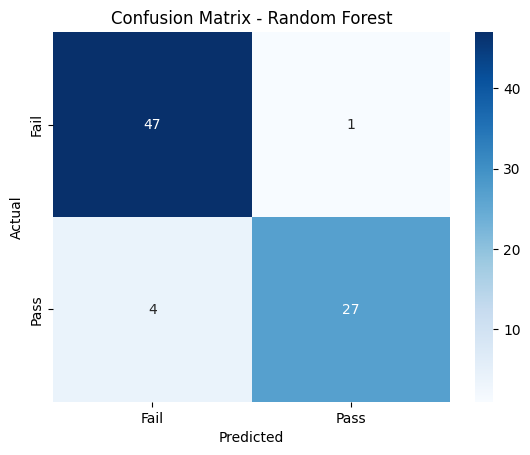

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer



# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical features
label_encoders = {}
for column in df_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])
    label_encoders[column] = le

# Feature selection
X = df_imputed.drop("G3", axis=1)
y = df_imputed["G3"]

# Binary classification target
y_binary = y.apply(lambda grade: 1 if grade >= 10 else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
_, _, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

# Convert predictions to binary
lr_preds_binary = np.where(lr_preds >= 10, 1, 0)
rf_preds_binary = np.where(rf_preds >= 10, 1, 0)

# Plot Confusion Matrix function
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Linear Regression Evaluation
print("=== Linear Regression Evaluation ===")
print("R²:", lr_r2)
print("MAE:", lr_mae)
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, lr_preds_binary))
print("Classification Report:\n", classification_report(y_test_binary, lr_preds_binary))
plot_conf_matrix(y_test_binary, lr_preds_binary, "Confusion Matrix - Linear Regression")

# Random Forest Evaluation
print("=== Random Forest Evaluation ===")
print("R²:", rf_r2)
print("MAE:", rf_mae)
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, rf_preds_binary))
print("Classification Report:\n", classification_report(y_test_binary, rf_preds_binary))
plot_conf_matrix(y_test_binary, rf_preds_binary, "Confusion Matrix - Random Forest")
